In [59]:
import cv2
import numpy as np # We'll be storing our data as numpy arrays
from tensorflow import keras #for loading model
import tensorflow as tf
import matplotlib.pyplot as plt # if you want to plot image or anything

In [53]:
cap = cv2.VideoCapture(0)
if not (cap.isOpened()):
    print("Video device not connected.")

In [63]:
reverselookup = { 1:"palm", 2:"l", 3:"fist", 4:"fist moved", 5:"thumb", 6:"index", 7:"ok", 8:"palm moved", 9:"c", 10:"down"}
reverselookup[10]

'down'

In [54]:

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

opencv_frame_0.png written!
Escape hit, closing...


In [55]:
cv2_im = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
image=cv2.resize(cv2_im,(320,120))
data=np.array(image,dtype = 'float32') #for input to model
data=data.reshape(1,120,320,1)

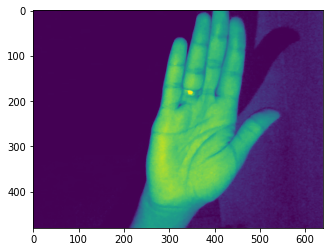

In [60]:
plt.imshow(cv2_im)
plt.show()

In [56]:
model = tf.keras.models.load_model('C:/Users/91932/Downloads/my_model.h5')

In [57]:
prediction=(model.predict_classes(data)+1)[0]

In [58]:
prediction

1

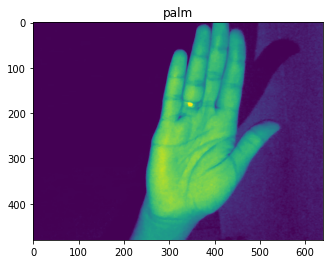

In [64]:
plt.imshow(cv2_im)
plt.title(reverselookup[prediction])
plt.show()